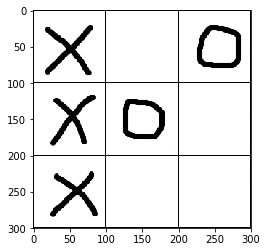

In [109]:
%matplotlib inline  

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('morpion1.png')
plt.imshow(img)

[[198.   0.]]
[[298.          1.5707964]]
[[198.          1.5707964]]
[[0.        1.5707964]]
[[99.  0.]]
[[299.   0.]]
[[99.         1.5707964]]
[[0. 0.]]
tabV
[0, 99, 198, 298]
tabH
[0, 99, 198, 299]


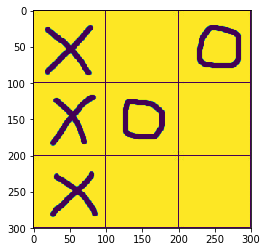

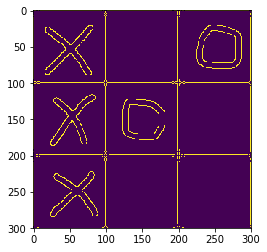

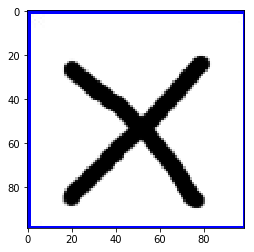

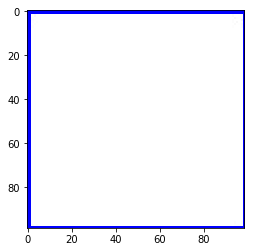

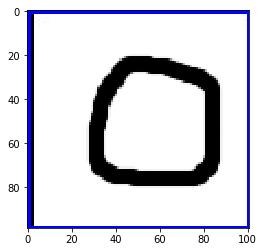

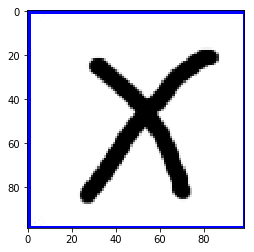

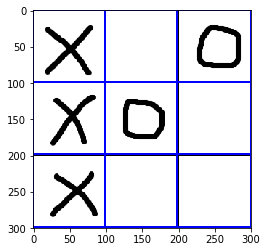

In [110]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
plt.figure()
plt.imshow(edges)

lines = cv2.HoughLines(edges,1,np.pi/180,200)

tabV = []
tabH = []

for line in lines:
    print(line)
    
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
        
        if theta !=0:
            tabV.append(int(rho))
        else:
            tabH.append(int(rho))
            
tabV.sort()
tabH.sort()
print('tabV')
print(tabV)
print('tabH')
print(tabH)

numCell=1

cellDic = {}


for i in range(len(tabH)-1):
    for j in range(len(tabV)-1):
        cell = img[tabV[i]:tabV[i+1],tabH[j]:tabH[j+1]]
        cellDic['cell'+str(numCell)] = cell
        numCell += 1



plt.figure()
plt.imshow(cellDic['cell1']) 
plt.figure()
plt.imshow(cellDic['cell2'])
plt.figure()
plt.imshow(cellDic['cell3'])
plt.figure()
plt.imshow(cellDic['cell4']) 


cv2.imwrite('houghlines3.jpg',img)
plt.figure()
plt.imshow(img)

